In [162]:
import sklearn as skl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans

RANDOM_SEED = 2022

# Data Visualization

In [73]:
db = pd.read_csv('../datasets/training_data.csv')

In [74]:
db.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [75]:
db.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [76]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [77]:
db.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [78]:
db.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

<AxesSubplot:>

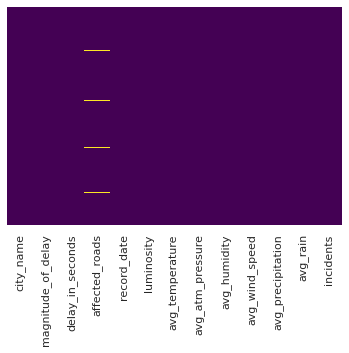

In [79]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
db['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [81]:
db[db['affected_roads'].isnull()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
29,Guimaraes,UNDEFINED,64,NaN,2021-01-22 09:00,LIGHT,8.0,1012.0,91.0,4.0,0.0,Sem Chuva,Medium
76,Guimaraes,UNDEFINED,223,NaN,2021-01-29 08:00,LIGHT,11.0,1022.0,92.0,1.0,0.0,Sem Chuva,High
79,Guimaraes,MAJOR,80,NaN,2021-12-24 21:00,DARK,11.0,1004.0,92.0,0.0,0.0,Sem Chuva,None
91,Guimaraes,UNDEFINED,52,NaN,2021-03-02 13:00,LIGHT,13.0,1024.0,78.0,2.0,0.0,Sem Chuva,Low
109,Guimaraes,UNDEFINED,139,NaN,2021-12-27 13:00,LIGHT,15.0,1014.0,88.0,5.0,0.0,Sem Chuva,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Guimaraes,MAJOR,298,NaN,2021-12-22 13:00,LIGHT,16.0,1015.0,71.0,3.0,0.0,Sem Chuva,None
4811,Guimaraes,UNDEFINED,96,NaN,2021-03-11 15:00,LIGHT,13.0,1025.0,89.0,3.0,0.0,chuva fraca,Medium
4838,Guimaraes,UNDEFINED,36,NaN,2021-03-10 13:00,LIGHT,14.0,1025.0,65.0,2.0,0.0,Sem Chuva,Low
4854,Guimaraes,UNDEFINED,233,NaN,2021-01-29 20:00,DARK,11.0,1017.0,92.0,1.0,0.0,Sem Chuva,High


# Data Preparation

In [82]:
db_m1 = db.copy()
db_m2 = db.copy()


In [83]:
db_m1.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [84]:
db_m1.drop(['affected_roads'],axis=1,inplace=True)
db_m1.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [85]:
db_m2.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [86]:
db_m2.fillna(0, inplace=True)
db_m2.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [87]:
db.drop(['affected_roads'],axis=1,inplace=True)

In [88]:
db.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


<AxesSubplot:>

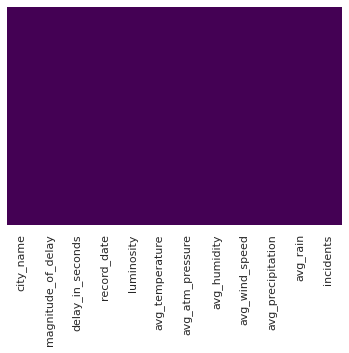

In [89]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [90]:
db.isnull().sum()

city_name             0
magnitude_of_delay    0
delay_in_seconds      0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_precipitation     0
avg_rain              0
incidents             0
dtype: int64

In [91]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_precipitation   5000 non-null   float64
 10  avg_rain            5000 non-null   object 
 11  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 468.9+ KB


In [92]:
db['avg_precipitation'].describe()

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: avg_precipitation, dtype: float64

In [93]:
db.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [94]:
db.drop(['avg_precipitation'],axis=1,inplace=True)
db.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [95]:
db['city_name'].head()

0    Guimaraes
1    Guimaraes
2    Guimaraes
3    Guimaraes
4    Guimaraes
Name: city_name, dtype: object

In [96]:
db.drop(['city_name'],axis=1,inplace=True)
db.dropna(inplace=True)

In [97]:
print(db['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


In [98]:
print(db['incidents'].value_counts().count())

5


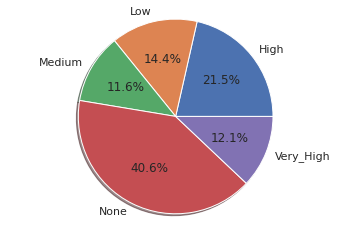

In [99]:
labels=db['incidents'].astype('category').cat.categories.tolist()
counts=db['incidents'].value_counts()
sizes=[counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


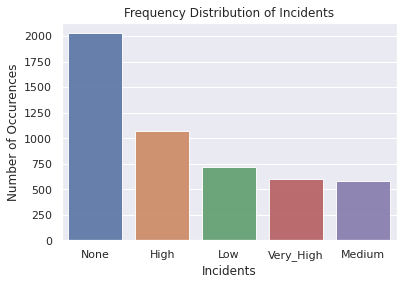

In [100]:
incidents_count = db['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Incidents',fontsize=12)
plt.show()


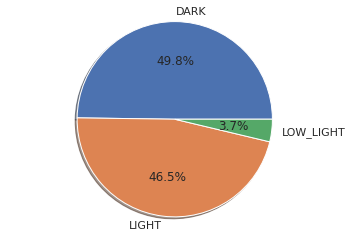

In [101]:
labels=db['luminosity'].astype('category').cat.categories.tolist()
counts=db['luminosity'].value_counts()
sizes=[counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

In [102]:
db_r1=db.copy()
db_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


### Label encoding ( luminosity, magnitude_of_delay, avg_rain, incidents
)

In [103]:
replace_map={'incidents':{'None':0,'Low':1,'Medium':2, 'High':3, 'Very_High':4}}

In [104]:
# incidents
labels=db_r1['incidents'].astype('category').cat.categories.tolist()
replace_map_comp={'incidents':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'incidents': {'High': 1, 'Low': 2, 'Medium': 3, 'None': 4, 'Very_High': 5}}


In [105]:
# luminosity
labels=db_r1['luminosity'].astype('category').cat.categories.tolist()
replace_map_lum={'luminosity':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_lum)
# magnitude of delay
labels=db_r1['magnitude_of_delay'].astype('category').cat.categories.tolist()
replace_map_mag={'magnitude_of_delay':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_mag)
# avg_rain
labels=db_r1['avg_rain'].astype('category').cat.categories.tolist()
replace_map_rain={'avg_rain':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_rain)

{'luminosity': {'DARK': 1, 'LIGHT': 2, 'LOW_LIGHT': 3}}
{'magnitude_of_delay': {'MAJOR': 1, 'MODERATE': 2, 'UNDEFINED': 3}}
{'avg_rain': {'Sem Chuva': 1, 'chuva forte': 2, 'chuva fraca': 3, 'chuva moderada': 4}}


In [106]:
db_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [107]:
db_r1.replace(replace_map_comp, inplace=True)
db_r1.replace(replace_map_lum, inplace=True)
db_r1.replace(replace_map_mag, inplace=True)
db_r1.replace(replace_map_rain, inplace=True)
db_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,3,0,2021-03-15 23:00,1,12.0,1013.0,70.0,1.0,1,4
1,3,385,2021-12-25 18:00,1,12.0,1007.0,91.0,1.0,1,4
2,3,69,2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,1,2
3,1,2297,2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,1,5
4,3,0,2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,1,1


In [108]:
print(db_r1['incidents'].dtypes)
db = db_r1
db.head()

int64


,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,3,0,2021-03-15 23:00,1,12.0,1013.0,70.0,1.0,1,4
1,3,385,2021-12-25 18:00,1,12.0,1007.0,91.0,1.0,1,4
2,3,69,2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,1,2
3,1,2297,2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,1,5
4,3,0,2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,1,1


In [109]:
#One-Hot encoding
db_r2 = db.copy()

In [110]:
lb = LabelBinarizer()
lb_results=lb.fit_transform(db_r2['incidents'])
lb_results_df=pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,1,2,3,4,5
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [111]:
result_df=pd.concat([db_r2,lb_results_df],axis=1)
result_df.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,1,2,3,4,5
0,3,0,2021-03-15 23:00,1,12.0,1013.0,70.0,1.0,1,4,0,0,0,1,0
1,3,385,2021-12-25 18:00,1,12.0,1007.0,91.0,1.0,1,4,0,0,0,1,0
2,3,69,2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,1,2,0,1,0,0,0
3,1,2297,2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,1,5,0,0,0,0,1
4,3,0,2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,1,1,1,0,0,0,0


In [112]:
#tratar datas
db_dt=db.copy()

In [113]:
db_dt['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [114]:
db_dt['record_date']=pd.to_datetime(db_dt['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')

In [115]:
assert db_dt['record_date'].isnull().sum()==0, 'missing record date'
db_dt['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [116]:
db_dt['record_date_year'] = db_dt['record_date'].dt.year
db_dt['record_date_month'] = db_dt['record_date'].dt.month
db_dt['record_date_day'] = db_dt['record_date'].dt.day
db_dt['record_date_hour'] = db_dt['record_date'].dt.hour
db_dt['record_date_minute'] = db_dt['record_date'].dt.minute

In [117]:
db_dt.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,3,0,2021-03-15 23:00:00,1,12.0,1013.0,70.0,1.0,1,4,2021,3,15,23,0
1,3,385,2021-12-25 18:00:00,1,12.0,1007.0,91.0,1.0,1,4,2021,12,25,18,0
2,3,69,2021-03-12 15:00:00,2,14.0,1025.0,64.0,0.0,1,2,2021,3,12,15,0
3,1,2297,2021-09-29 09:00:00,2,15.0,1028.0,75.0,1.0,1,5,2021,9,29,9,0
4,3,0,2021-06-13 11:00:00,2,27.0,1020.0,52.0,1.0,1,1,2021,6,13,11,0


In [118]:
db_dt.nunique()

magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

In [119]:
#o ano e o minuto só têm 1 valor, logo vamos retirar estes parametros
db_dt.drop('record_date_year',axis=1,inplace=True)
db_dt.drop('record_date_minute',axis=1,inplace=True)
db_dt.drop('record_date',axis=1,inplace=True)
db_dt.dropna(inplace=True)

In [120]:
db['record_date'] = pd.to_datetime(db['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
#db.info()

In [121]:
db.nunique()

magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
dtype: int64

## Decision Tree Classifier

In [122]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  5000 non-null   int64         
 1   delay_in_seconds    5000 non-null   int64         
 2   record_date         5000 non-null   datetime64[ns]
 3   luminosity          5000 non-null   int64         
 4   avg_temperature     5000 non-null   float64       
 5   avg_atm_pressure    5000 non-null   float64       
 6   avg_humidity        5000 non-null   float64       
 7   avg_wind_speed      5000 non-null   float64       
 8   avg_rain            5000 non-null   int64         
 9   incidents           5000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 429.7 KB


In [155]:
x = db.drop(['incidents'], axis=1)
y = db['incidents'].to_frame()

In [156]:
print(y.shape)

(5000, 1)


In [157]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=RANDOM_SEED)
print("X %s; X_train %s; X_test %s" %(x.shape,X_train.shape,X_test.shape))
print("y %s; y_train %s; y_test %s" %(y.shape,y_train.shape,y_test.shape))

X (5000, 9); X_train (3750, 9); X_test (1250, 9)
y (5000, 1); y_train (3750, 1); y_test (1250, 1)


In [158]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)

In [159]:
clf.fit(X_train,y_train)

TypeError: invalid type promotion

## SVC Model

### Cross Validation

In [160]:
cross_val_model = SVC(random_state=RANDOM_SEED)
scores = cross_val_score(cross_val_model,x,y,cv=10)
scores

/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/svm/_base.py", line 171, in fit
    accept_large_sparse=False)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/h

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [161]:
model = SVC(random_state=RANDOM_SEED)
model.fit(X_train,y_train)

TypeError: invalid type promotion

## K-means CLustering

In [166]:
kmeans = KMeans(n_clusters=5, random_state=RANDOM_SEED)
kmeans.fit(x)

TypeError: invalid type promotion